# Task 1: Retrieving and Preparing the Data

## check num dead and alive

In [3]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

In [4]:
df = pd.read_csv("./DataSets/Heart failure clinical records Data set/heart_failure_clinical_records_dataset.csv")

In [5]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [6]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

We can see that there are no missing values present in the data set.

In [7]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

The data types of the values in the data set are shown below. It can be seen that `age` is a float, despite the age being in years. Therefore it should be converted into an integer. I am not going to be changing the boolean values as integers as this is necessary for classification.

In [8]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

The data types now all match.

In [9]:
df['age'] = df['age'].astype('int')
df.dtypes

age                           int64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

Check to see if they meet all of the required ranges.

In [10]:
df.describe(include=['int64', 'float64']).T.style.set_precision(3)

,count,mean,std,min,25%,50%,75%,max
age,299.000,60.829,11.895,40.000,51.000,60.000,70.000,95.000
anaemia,299.000,0.431,0.496,0.000,0.000,0.000,1.000,1.000
creatinine_phosphokinase,299.000,581.839,970.288,23.000,116.500,250.000,582.000,7861.000
diabetes,299.000,0.418,0.494,0.000,0.000,0.000,1.000,1.000
ejection_fraction,299.000,38.084,11.835,14.000,30.000,38.000,45.000,80.000
high_blood_pressure,299.000,0.351,0.478,0.000,0.000,0.000,1.000,1.000
platelets,299.000,263358.029,97804.237,25100.000,212500.000,262000.000,303500.000,850000.000
serum_creatinine,299.000,1.394,1.035,0.500,0.900,1.100,1.400,9.400
serum_sodium,299.000,136.625,4.412,113.000,134.000,137.000,140.000,148.000
sex,299.000,0.649,0.478,0.000,0.000,1.000,1.000,1.000


In [15]:
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

# Data Exploration

I will first create an updated data set to change the boolean values to the corresponding values (e.g. changing `Sex` to have 'Man' and 'Woman' to help to interpret the data more easily

In [9]:
g_df = df.copy()
cols = ['anaemia', 'high_blood_pressure', 'diabetes', 'sex', 'smoking', 'DEATH_EVENT']
for col in cols:
    g_df[col] = g_df[col].astype('str')

# anaemia
g_df['anaemia'] = g_df['anaemia'].str.replace('0','No Anaemia')
g_df['anaemia'] = g_df['anaemia'].str.replace('1','Anaemia')

# high blood pressure
g_df['high_blood_pressure'] = g_df['high_blood_pressure'].str.replace('0','Not High Blood Pressure')
g_df['high_blood_pressure'] = g_df['high_blood_pressure'].str.replace('1','High Blood Pressure')

# diabetes
g_df['diabetes'] = g_df['diabetes'].str.replace('0','Non-Diabetic')
g_df['diabetes'] = g_df['diabetes'].str.replace('1','Diabetic')

# sex
g_df['sex'] = g_df['sex'].str.replace('0','Woman')
g_df['sex'] = g_df['sex'].str.replace('1','Man')

# smoking
g_df['smoking'] = g_df['smoking'].str.replace('0','Non-Smoker')
g_df['smoking'] = g_df['smoking'].str.replace('1','Smoker')

# death event
g_df['DEATH_EVENT'] = g_df['DEATH_EVENT'].str.replace('0','Not Dead')
g_df['DEATH_EVENT'] = g_df['DEATH_EVENT'].str.replace('1','Dead')


### Task 2.1

I will first explore the distribution of the age of all the patients in the data set. 

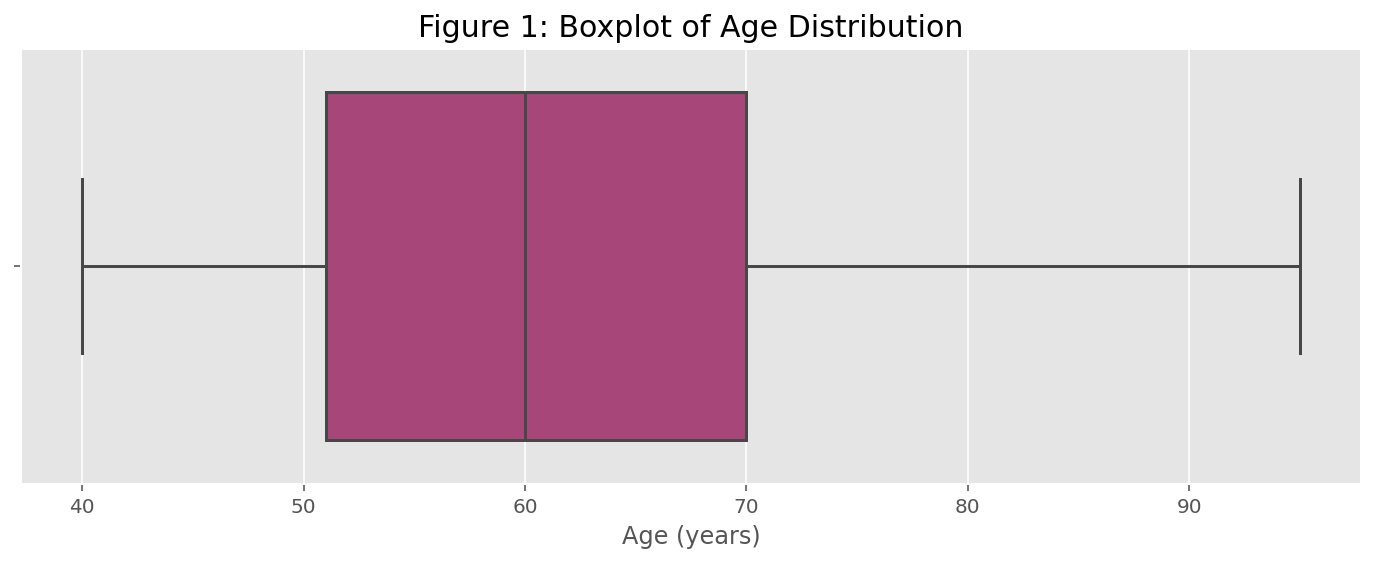

In [10]:
plt.figure(figsize = (12,4))
sns.boxplot(df['age'], palette='magma').set_title('Figure 1: Boxplot of Age Distribution', fontsize = 15)
plt.xlabel('Age (years)')
plt.show();

Creatinine Phosphokinase (CPK)

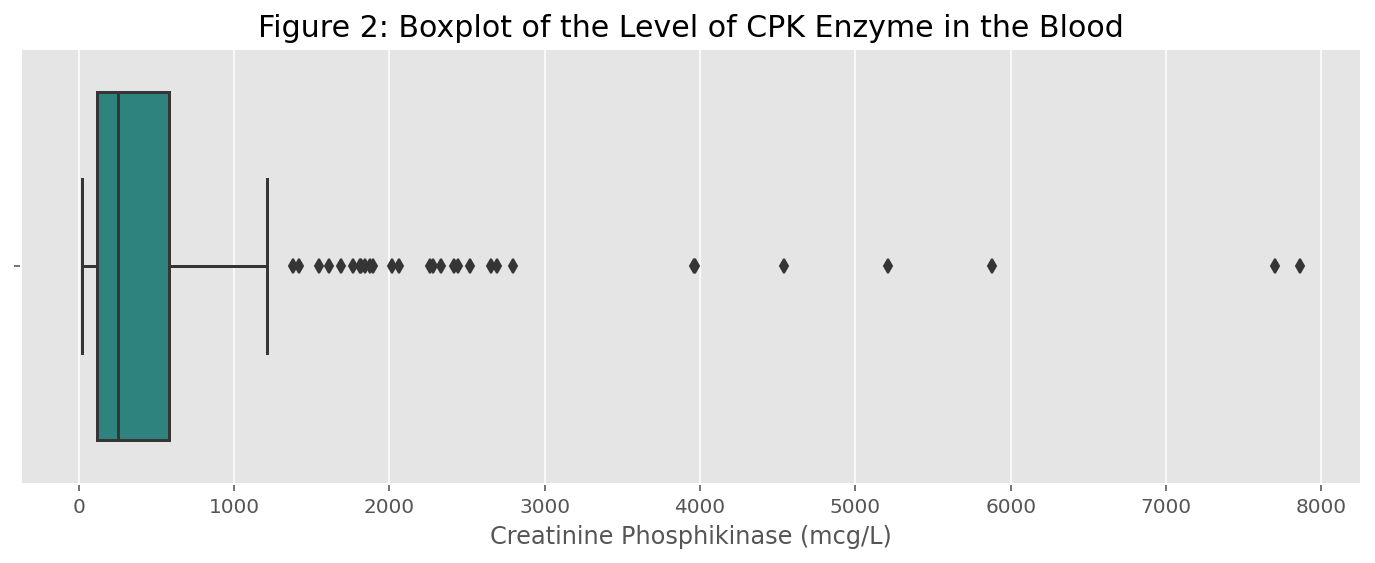

In [11]:
plt.figure(figsize = (12,4))
sns.boxplot(df['creatinine_phosphokinase'], palette='viridis').set_title('Figure 2: Boxplot of the Level of CPK Enzyme in the Blood', fontsize = 15)
plt.xlabel('Creatinine Phosphikinase (mcg/L)')
plt.show();

Ejection Fraction - this is the percentage of blood leaving the heart at each contraction.

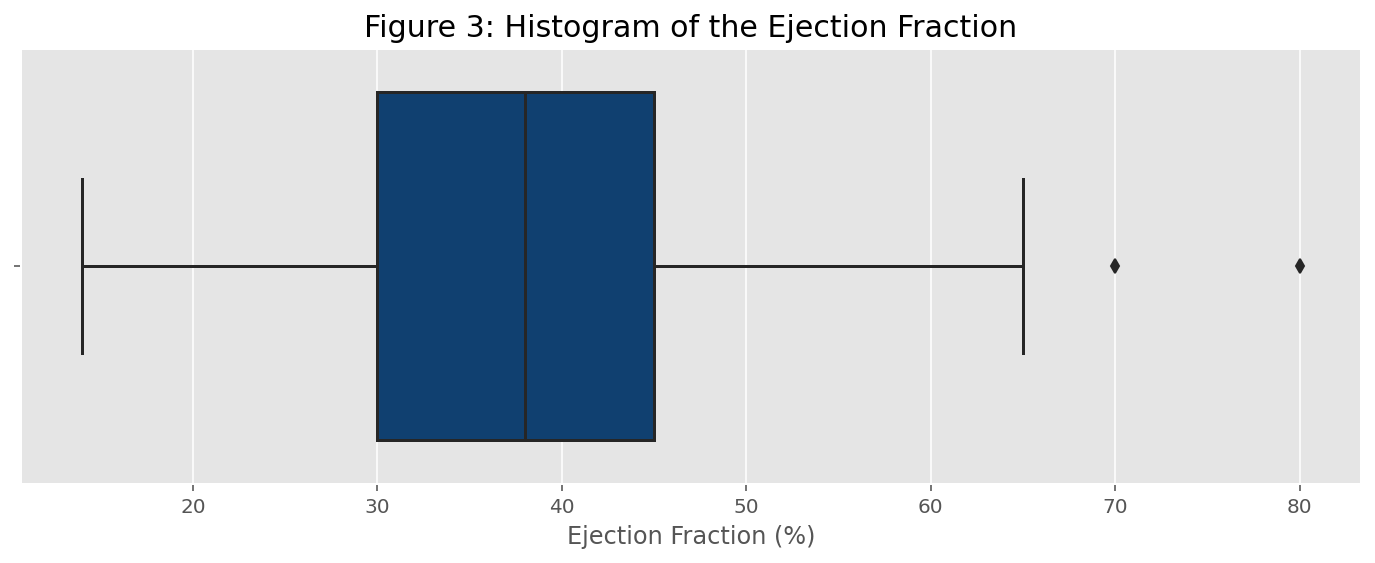

In [12]:
plt.figure(figsize = (12,4))
sns.boxplot(df['ejection_fraction'], palette='ocean').set_title('Figure 3: Histogram of the Ejection Fraction', fontsize = 15)
plt.xlabel('Ejection Fraction (%)')
plt.show();

Platelets - in the blood

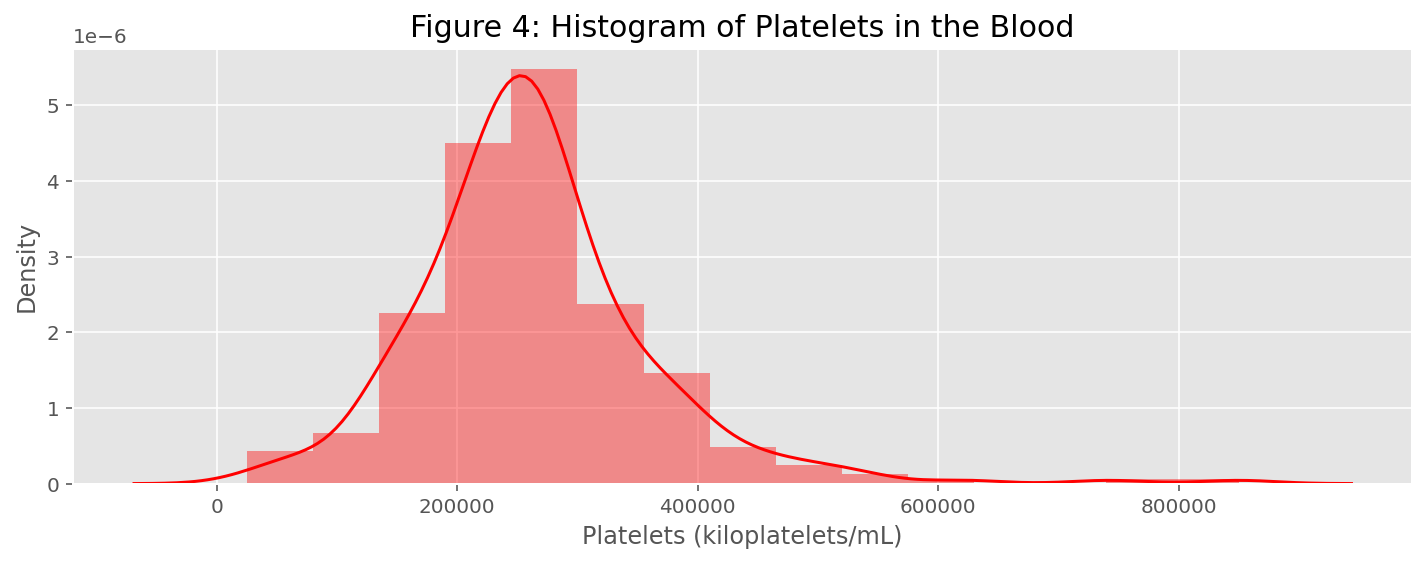

In [13]:
plt.figure(figsize = (12,4))
sns.distplot(df['platelets'], kde=True, bins=15, color = 'red').set_title('Figure 4: Histogram of Platelets in the Blood', fontsize = 15)
plt.xlabel('Platelets (kiloplatelets/mL)')
plt.show();

Serum Creatinine - level of creatinine in the blood

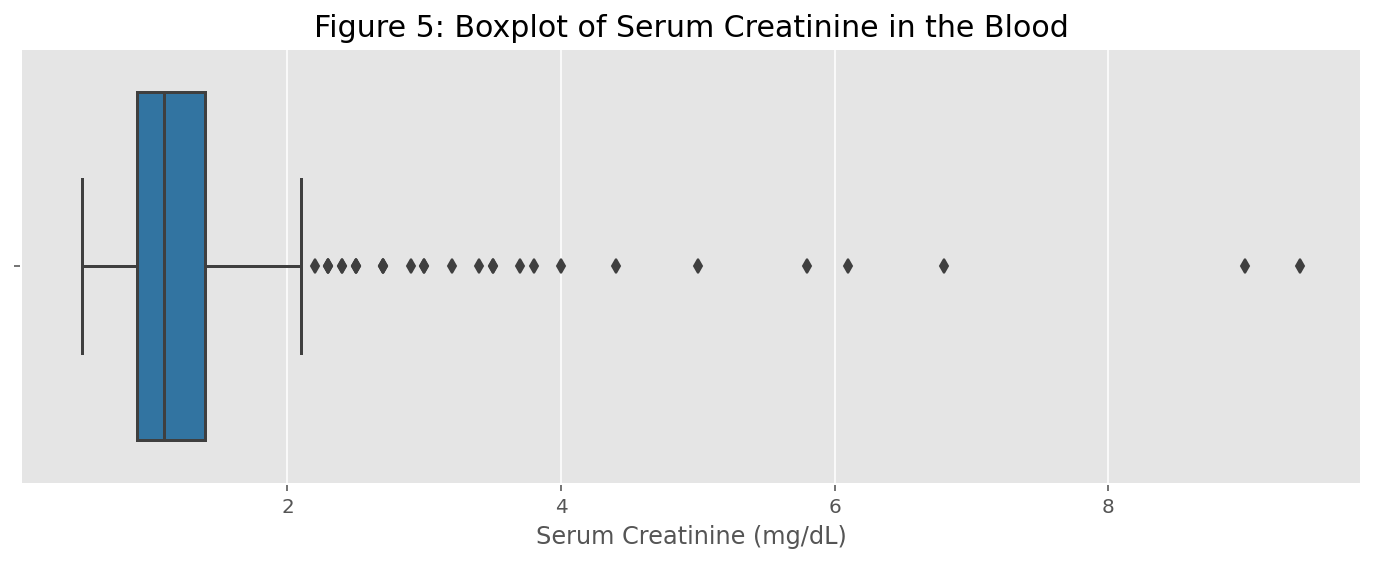

In [14]:
plt.figure(figsize = (12,4))
sns.boxplot(df['serum_creatinine'], palette='tab20').set_title('Figure 5: Boxplot of Serum Creatinine in the Blood', fontsize = 15)
plt.xlabel('Serum Creatinine (mg/dL)')
plt.show();

Serum Sodium - level of sodium in the blood

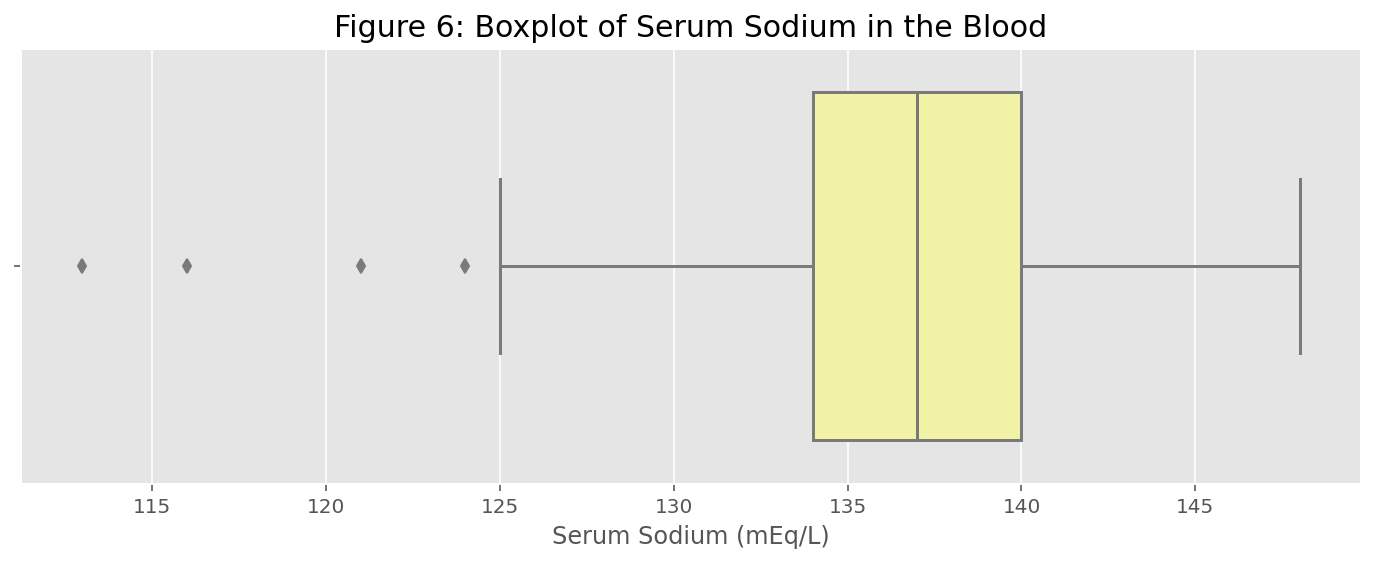

In [15]:
plt.figure(figsize = (12,4))
sns.boxplot(df['serum_sodium'], palette='Accent_r').set_title('Figure 6: Boxplot of Serum Sodium in the Blood', fontsize = 15)
plt.xlabel('Serum Sodium (mEq/L)')
plt.show();

Time of follow-up period in days

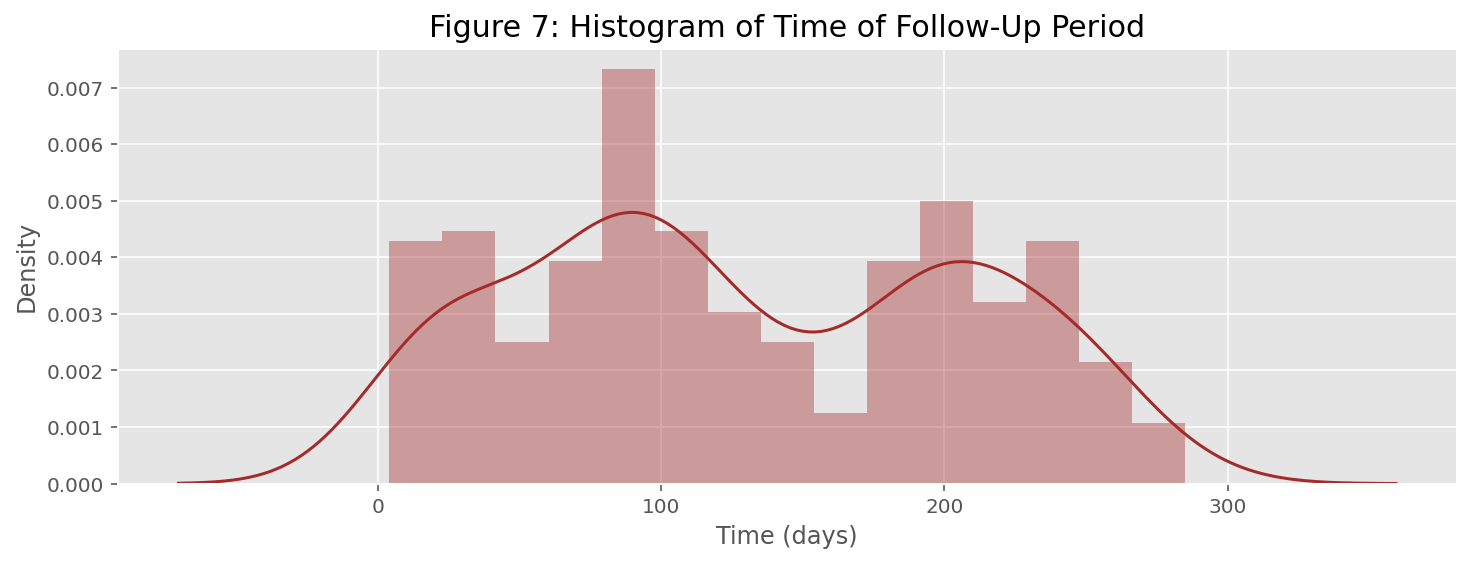

In [16]:
plt.figure(figsize = (12,4))
sns.distplot(df['time'], kde=True, bins=15, color = 'brown').set_title('Figure 7: Histogram of Time of Follow-Up Period', fontsize = 15)
plt.xlabel('Time (days)')
plt.show();

Distribution of sex for all the patients.

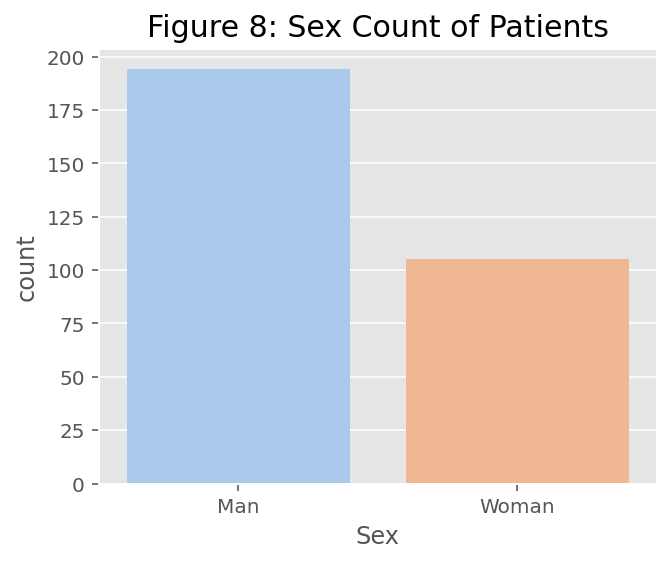

In [17]:
plt.figure(figsize = (5,4))
fig = sns.countplot(x = 'sex', data = g_df, palette = 'pastel')
fig = plt.title('Figure 8: Sex Count of Patients', fontsize = 15)
plt.xlabel('Sex')
plt.show()

Distribution of smokers and non-smokers.

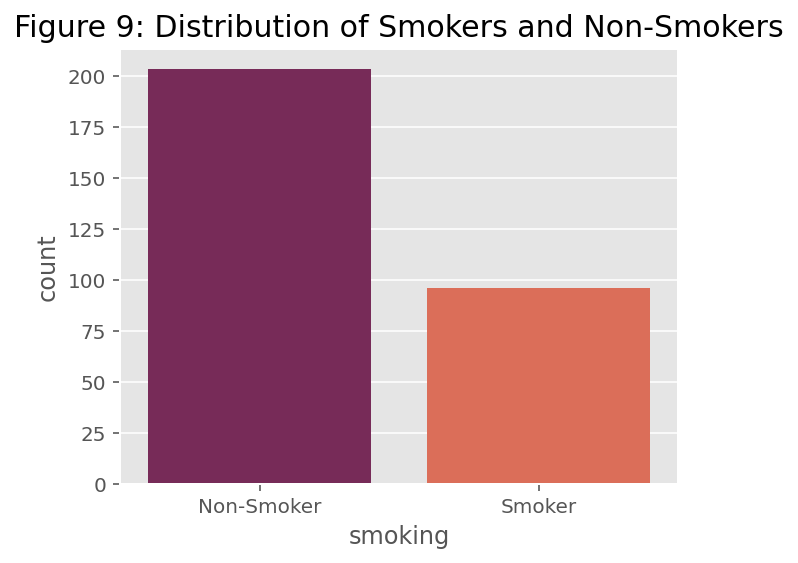

In [18]:
plt.figure(figsize = (5,4))
fig = sns.countplot(x = 'smoking', data = g_df, palette = 'rocket')
fig = plt.title('Figure 9: Distribution of Smokers and Non-Smokers', fontsize = 15)
plt.show()

See if patients are diabetic or not.

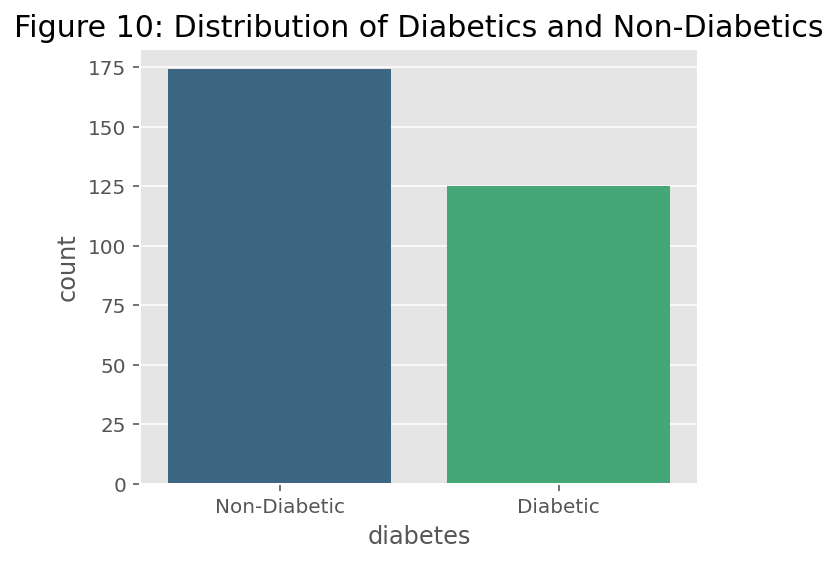

In [19]:
plt.figure(figsize = (5,4))
fig = sns.countplot(x = 'diabetes', data = g_df, palette = 'viridis')
fig = plt.title('Figure 10: Distribution of Diabetics and Non-Diabetics', fontsize = 15)
plt.show()

Anaemia

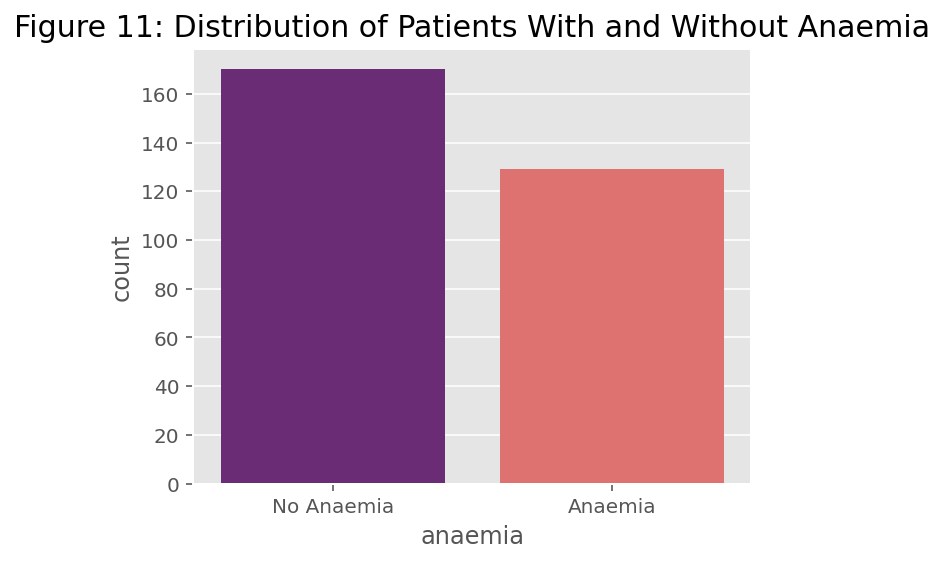

In [20]:
plt.figure(figsize = (5,4))
fig = sns.countplot(x = 'anaemia', data = g_df, palette = 'magma')
fig = plt.title('Figure 11: Distribution of Patients With and Without Anaemia', fontsize = 15)
plt.show()

High-Blood Pressure

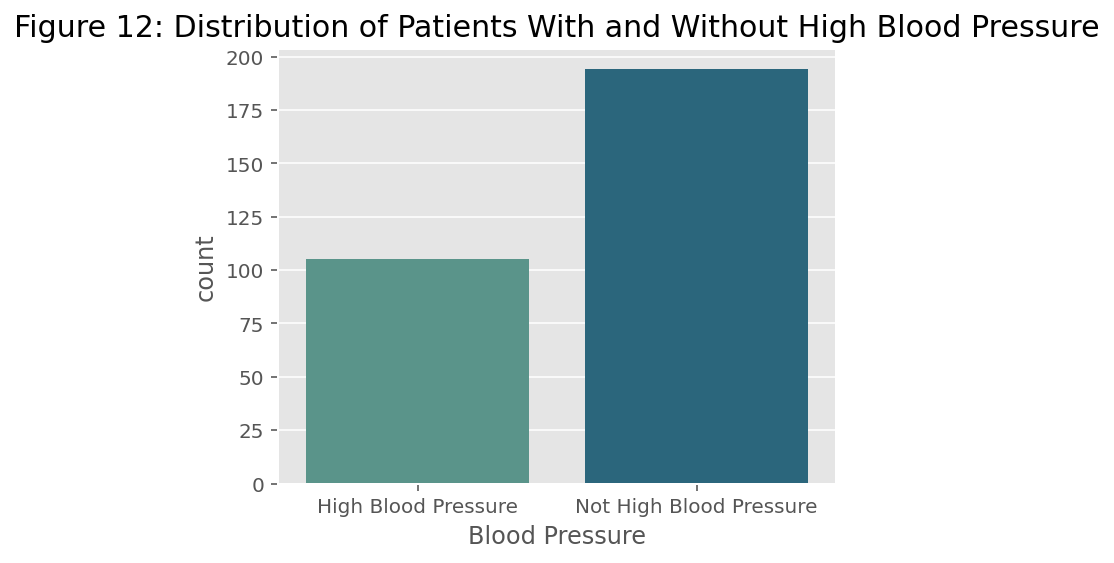

In [21]:
plt.figure(figsize = (5,4))
fig = sns.countplot(x = 'high_blood_pressure', data = g_df, palette = 'crest')
fig = plt.title('Figure 12: Distribution of Patients With and Without High Blood Pressure', fontsize = 15)
fig = plt.xlabel('Blood Pressure')
plt.show()

Death Event

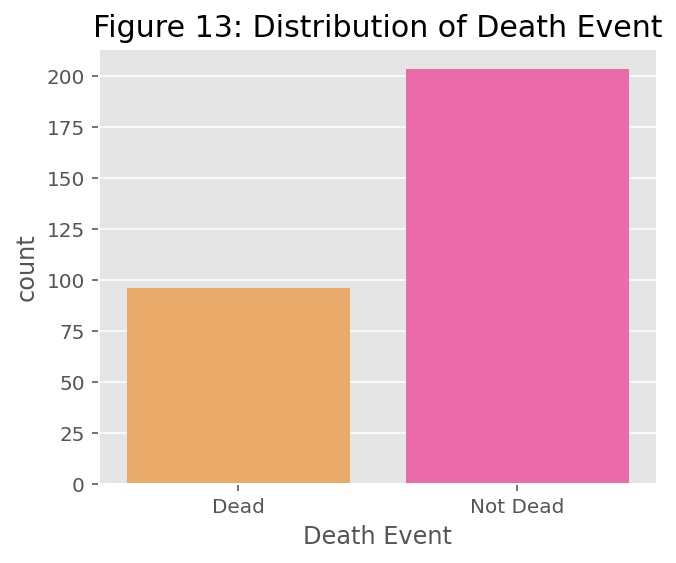

In [22]:
plt.figure(figsize = (5,4))
fig = sns.countplot(x = 'DEATH_EVENT', data = g_df, palette = 'spring_r')
fig = plt.title('Figure 13: Distribution of Death Event', fontsize = 15)
fig = plt.xlabel('Death Event')
plt.show()

### Task 2.2

Relationship between death event and sex.

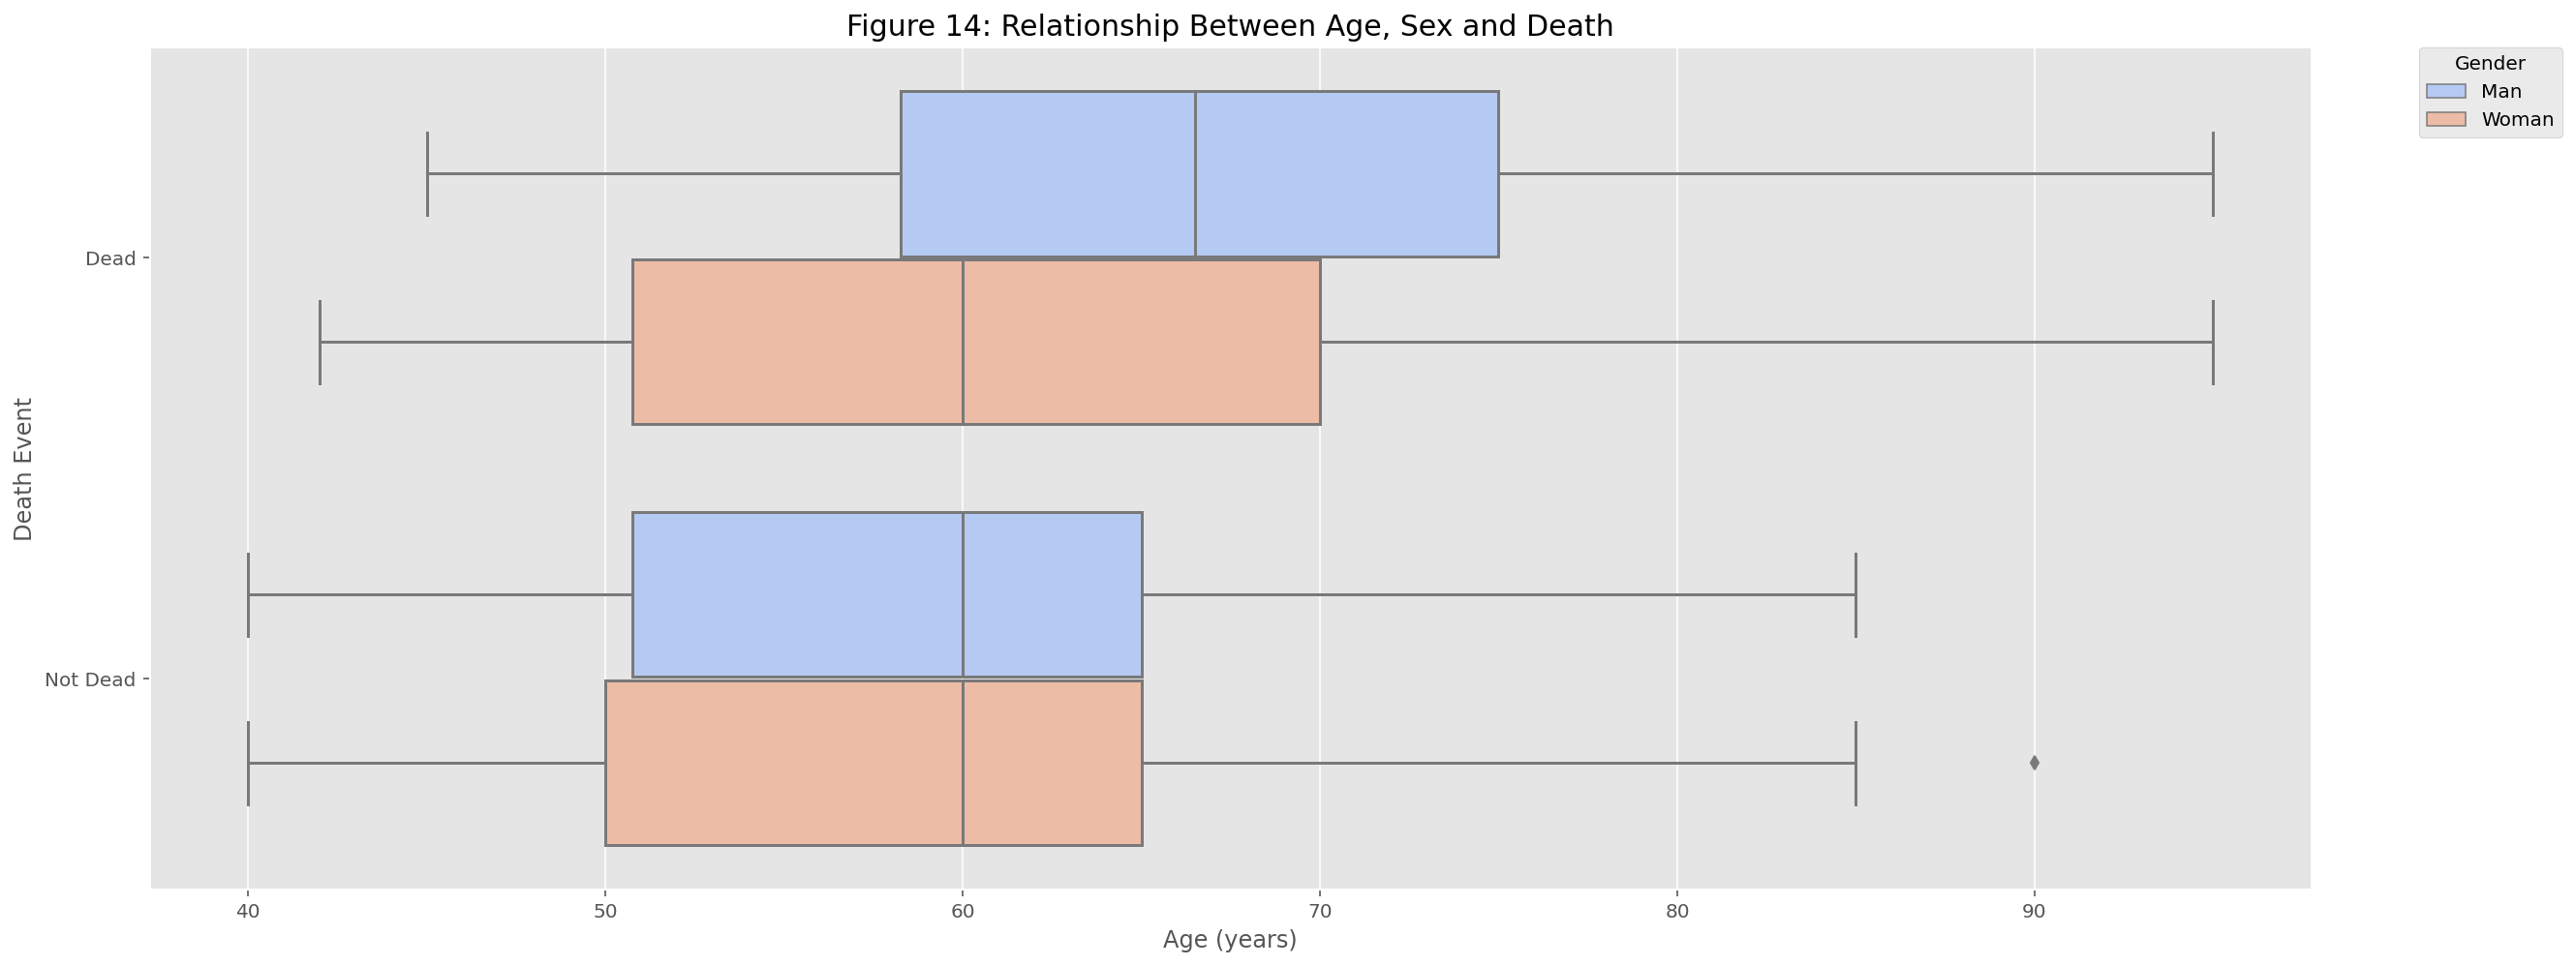

In [23]:
plt.figure(figsize = (20,8))
sns.boxplot(x="age", y="DEATH_EVENT", hue="sex", data=g_df, palette = 'coolwarm');

plt.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0., title="Gender");

plt.xlabel("Age (years)");
plt.ylabel("Death Event");
plt.title('Figure 14: Relationship Between Age, Sex and Death', fontsize = 15)
plt.show()

Relationship between creatinine phosphokinase and death event.

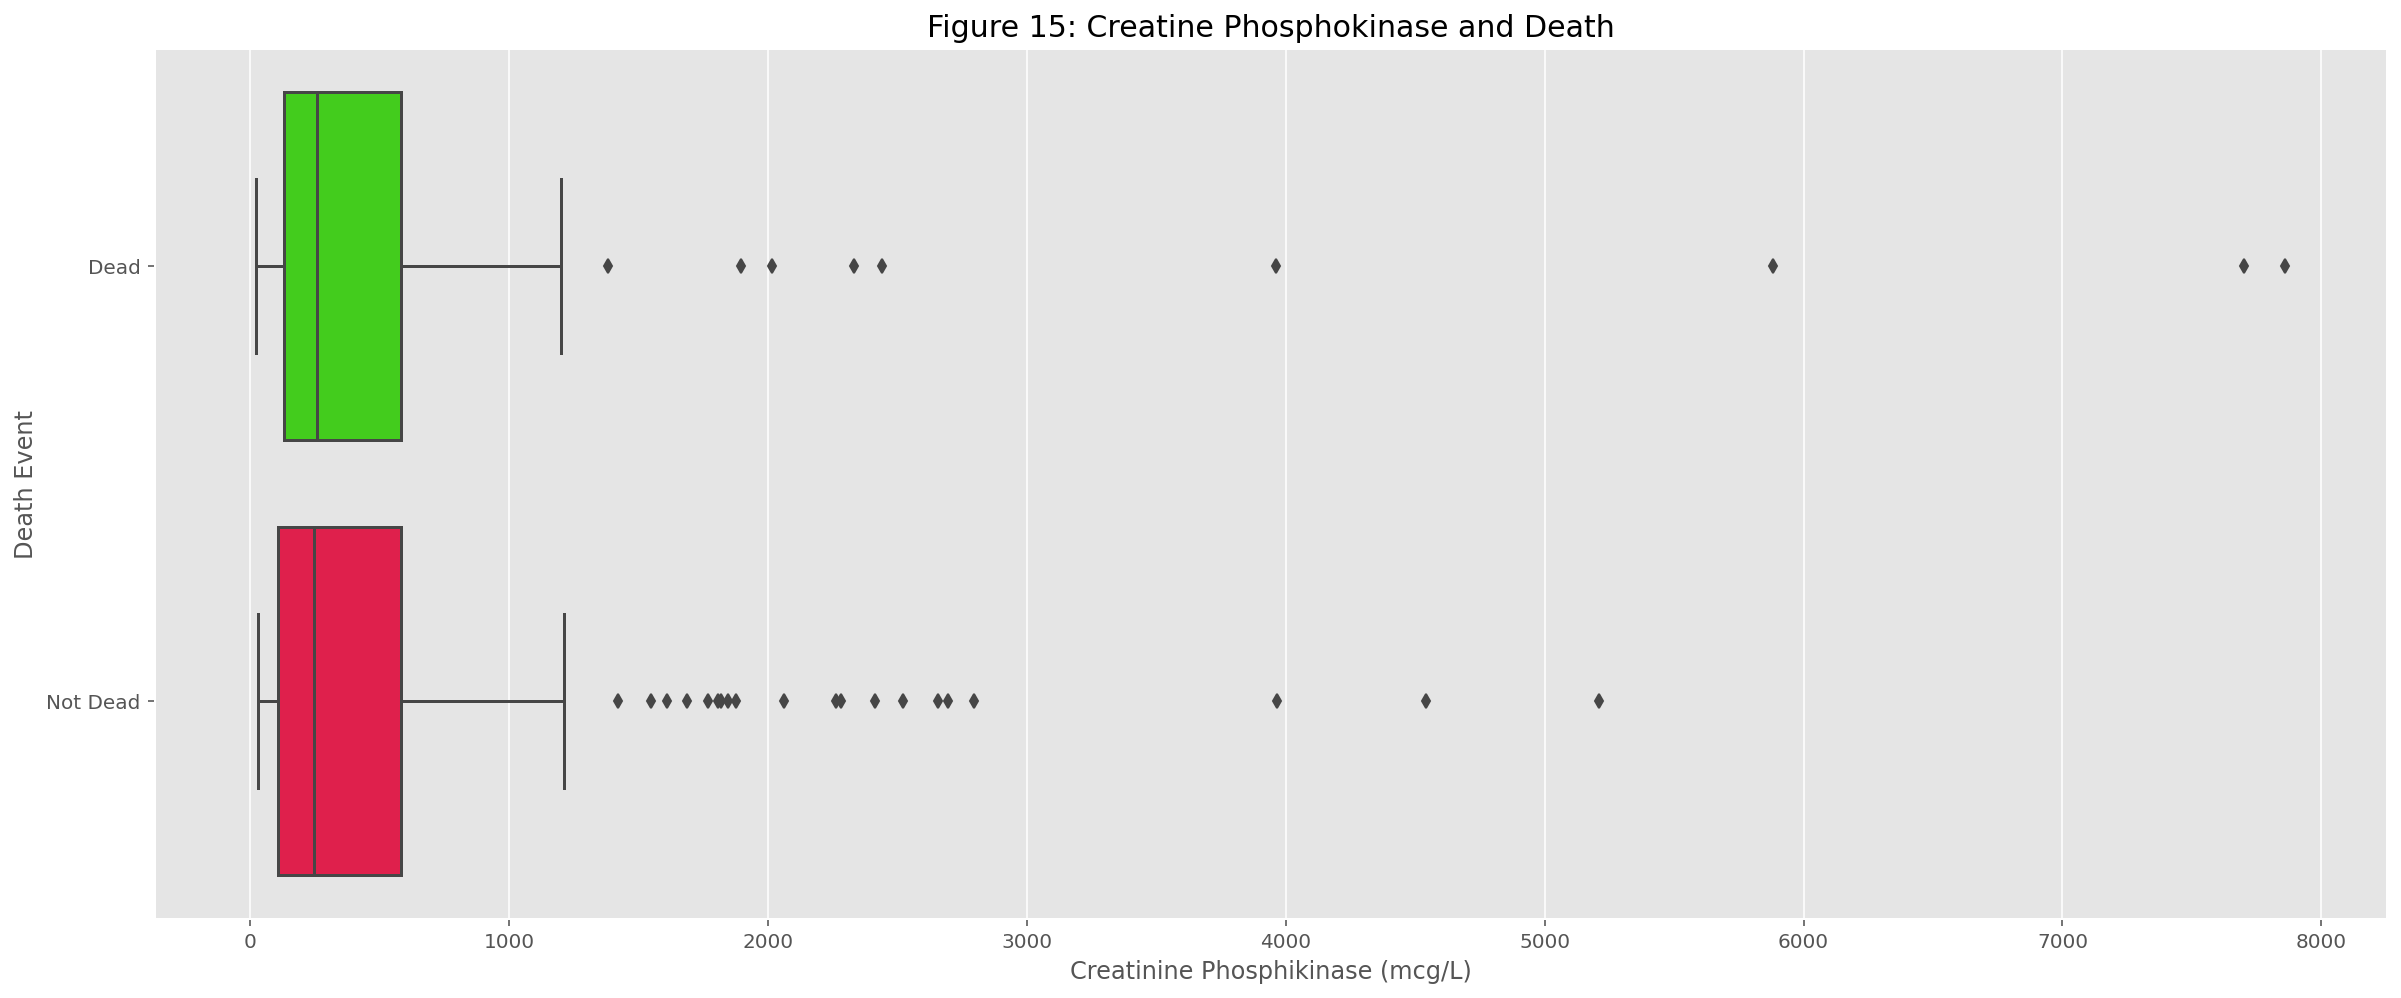

In [24]:
plt.figure(figsize = (20,8))
sns.boxplot(g_df['creatinine_phosphokinase'], g_df['DEATH_EVENT'], palette = 'prism');
plt.title('Figure 15: Creatinine Phosphokinase and Death', fontsize = 15)
plt.xlabel("Creatinine Phosphikinase (mcg/L)");
plt.ylabel("Death Event");
plt.show();

Relationship between ejection fraction and death.

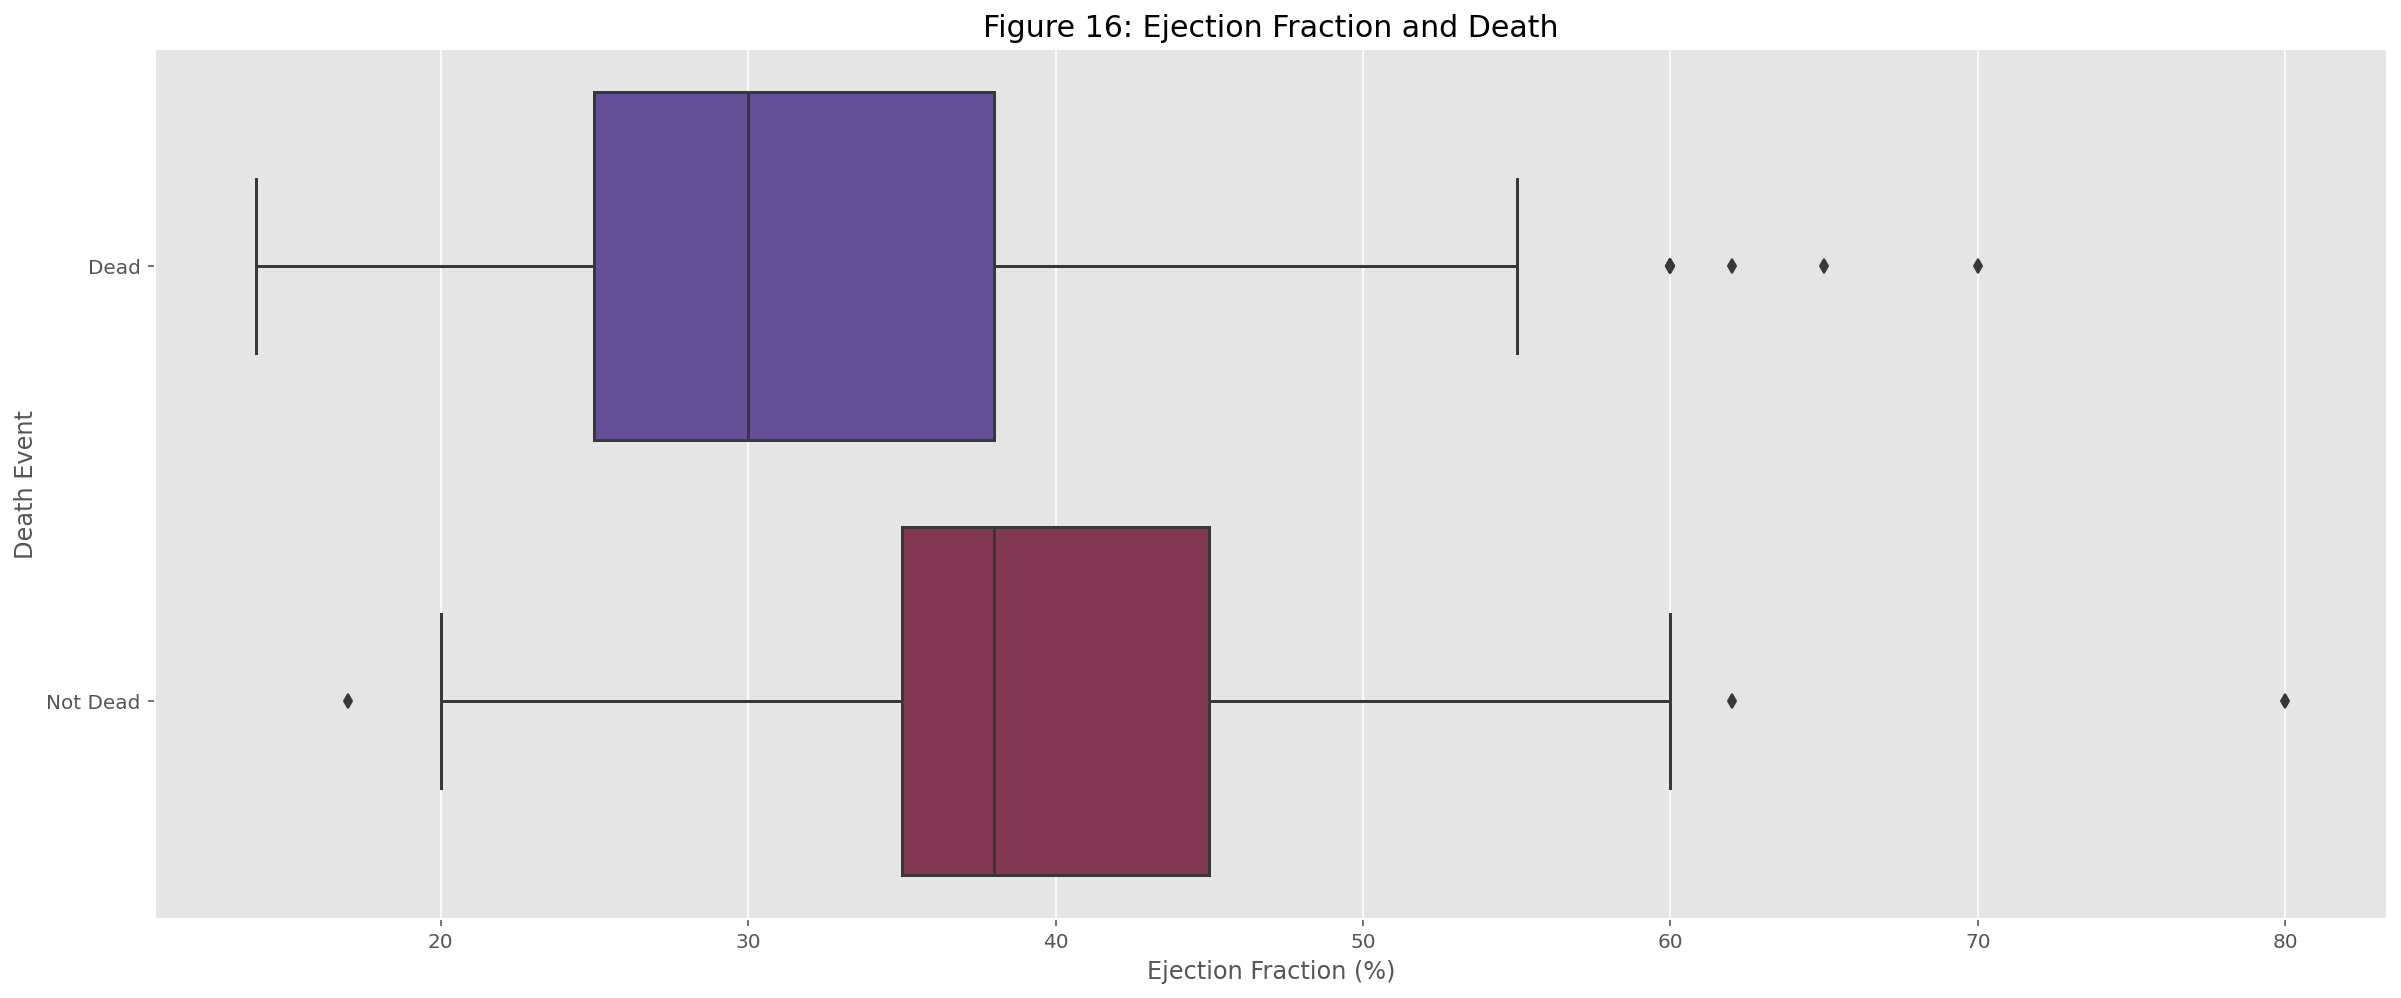

In [25]:
plt.figure(figsize = (20,8))
sns.boxplot(g_df['ejection_fraction'], g_df['DEATH_EVENT'], palette = 'twilight');
plt.title('Figure 16: Ejection Fraction and Death', fontsize = 15)
plt.xlabel("Ejection Fraction (%)");
plt.ylabel("Death Event");
plt.show();

Relationship between Platelets and Death

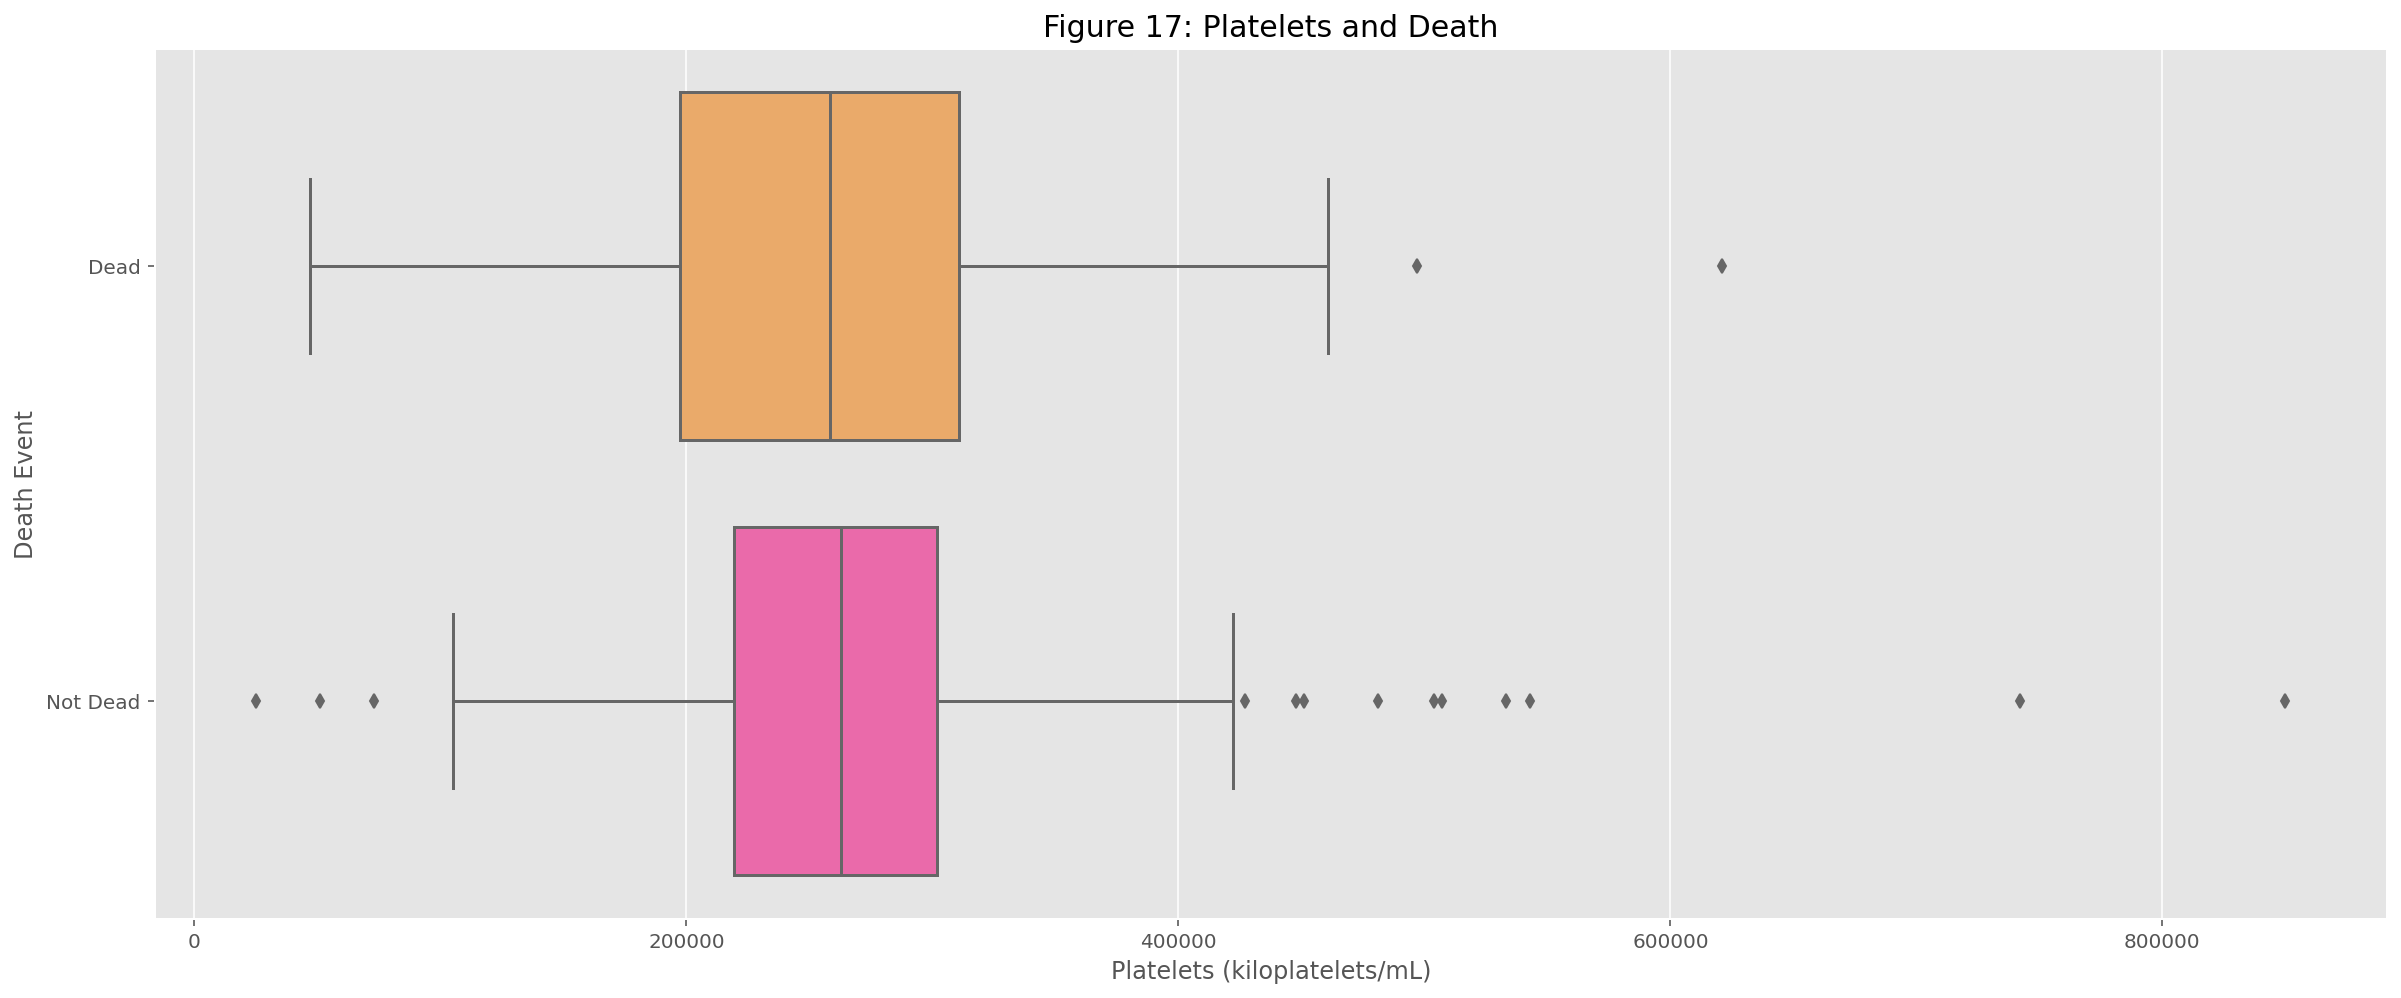

In [26]:
plt.figure(figsize = (20,8))
sns.boxplot(g_df['platelets'], g_df['DEATH_EVENT'], palette = 'spring_r');
plt.title('Figure 17: Platelets and Death', fontsize = 15)
plt.xlabel("Platelets (kiloplatelets/mL)");
plt.ylabel("Death Event");
plt.show();

Relationship between serum creatinine and death.

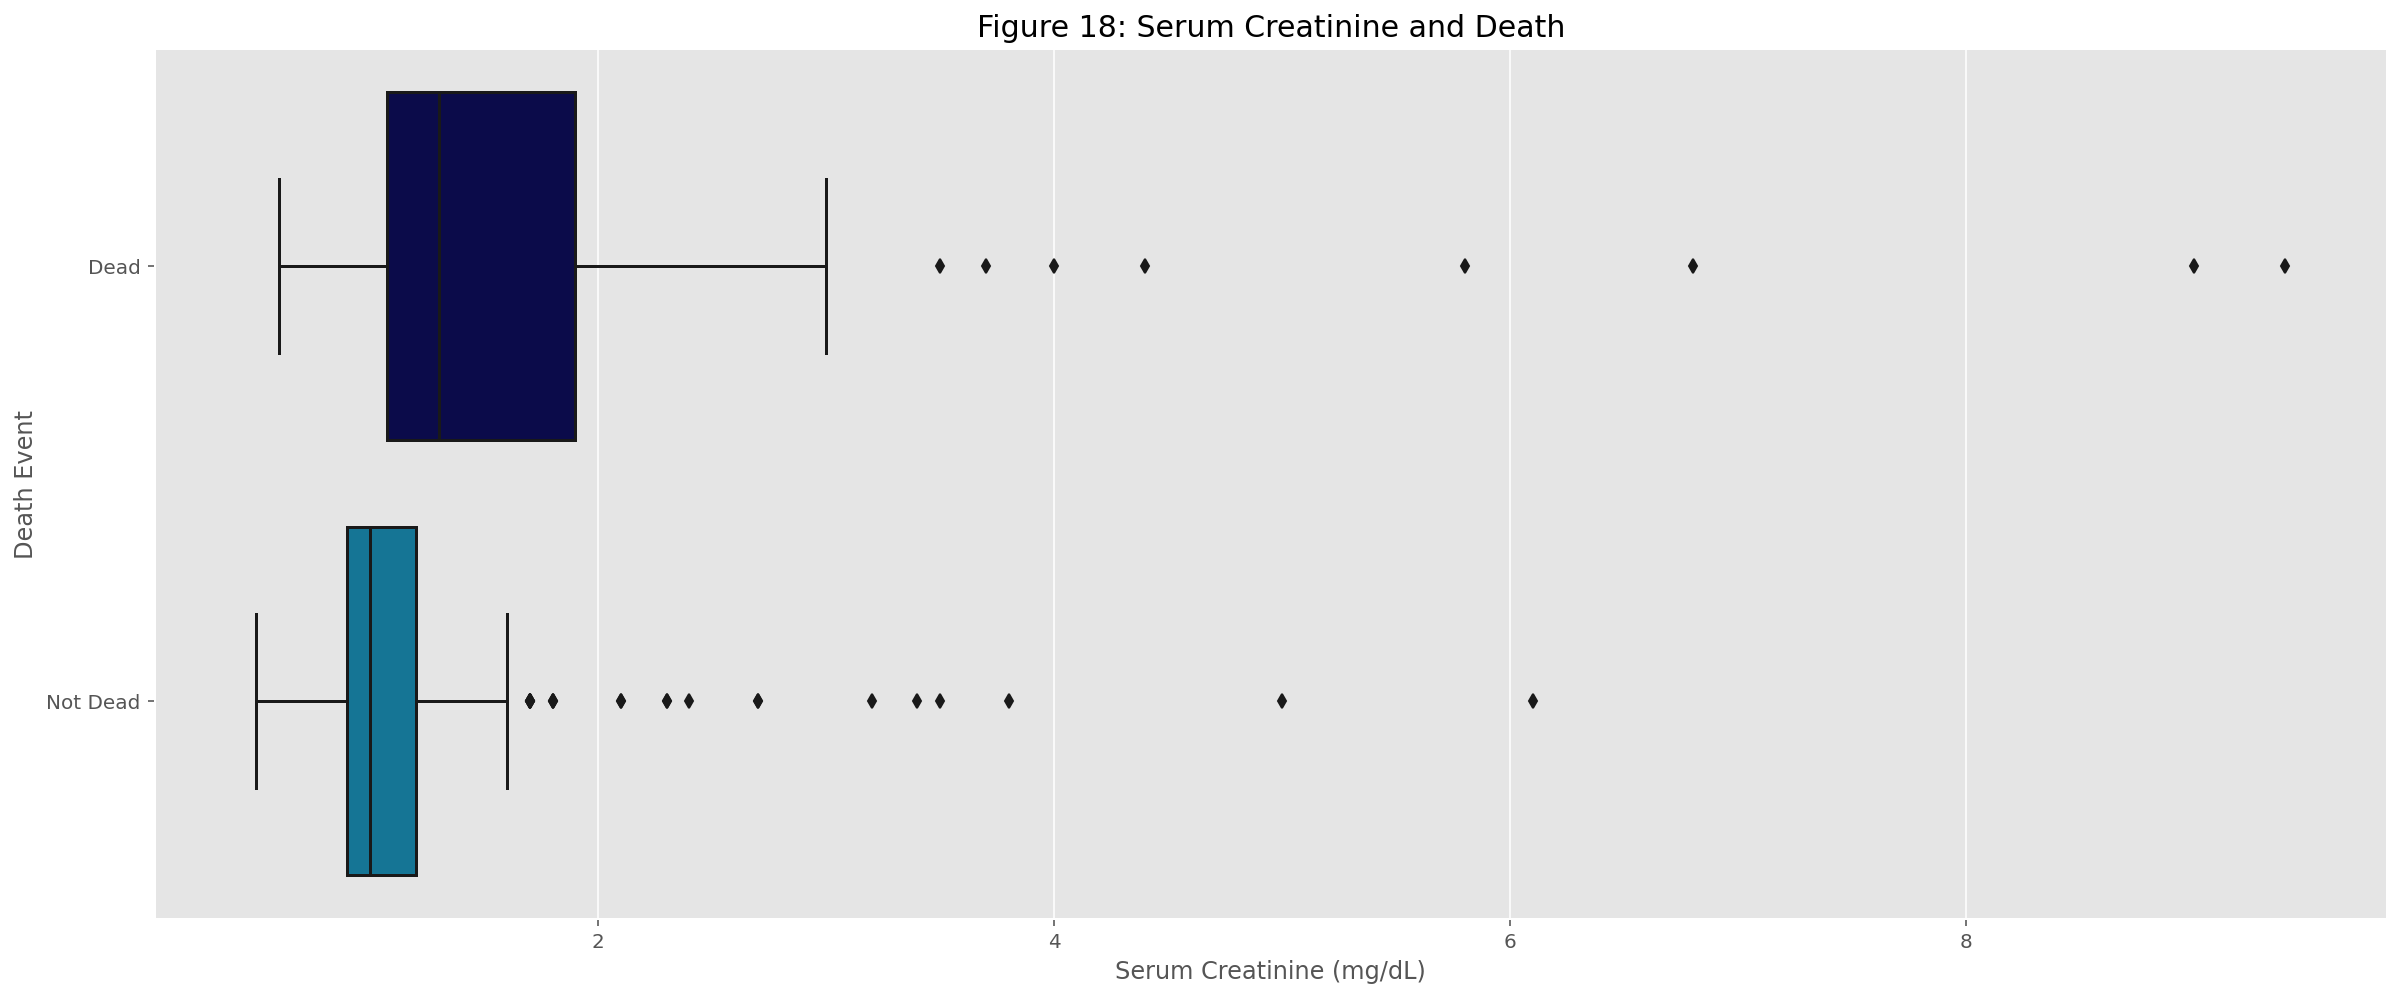

In [27]:
plt.figure(figsize = (20,8))
sns.boxplot(g_df['serum_creatinine'], g_df['DEATH_EVENT'], palette = 'ocean');
plt.title('Figure 18: Serum Creatinine and Death', fontsize = 15)
plt.xlabel("Serum Creatinine (mg/dL)");
plt.ylabel("Death Event");
plt.show();

Relationship between serum sodium and death.

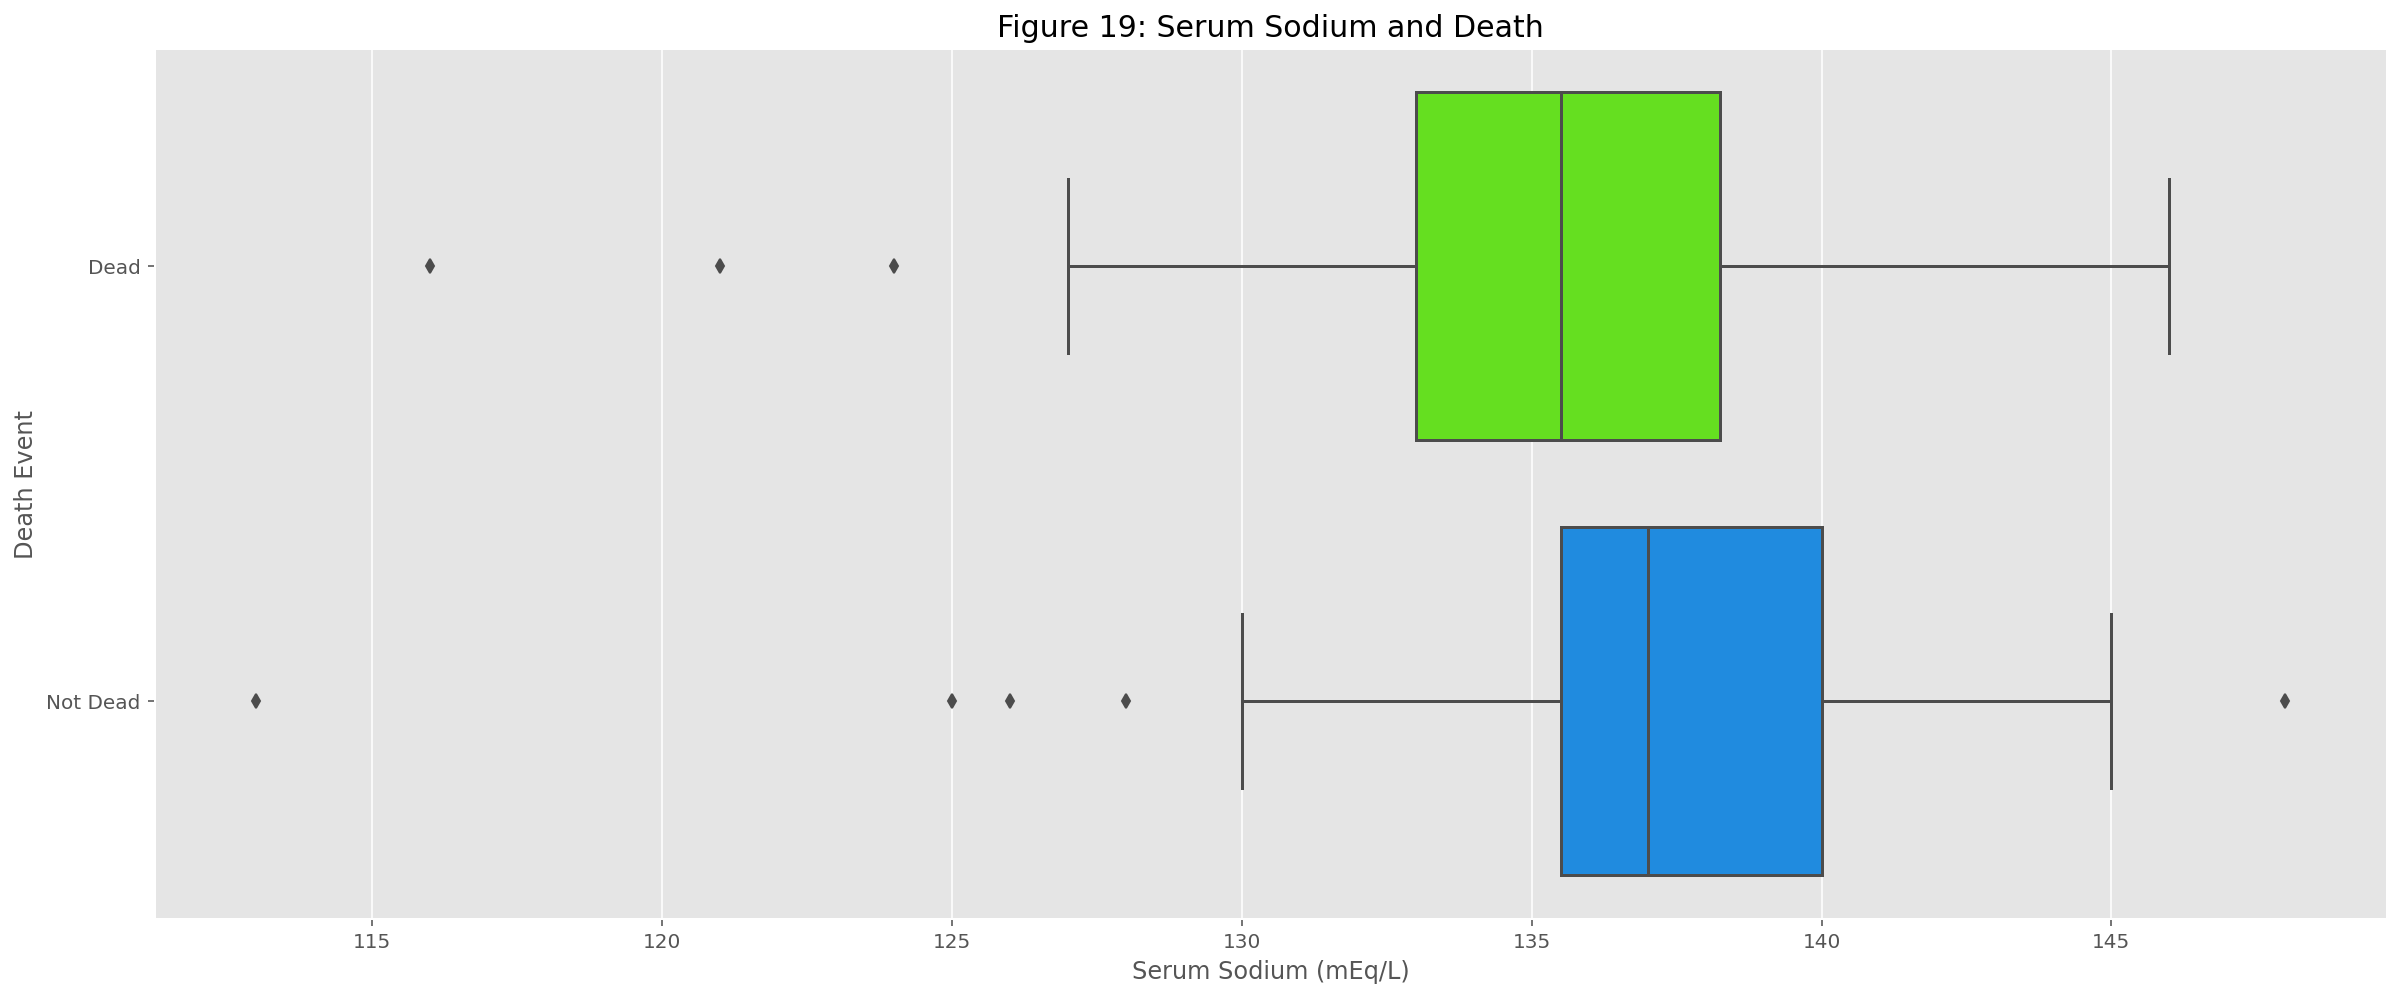

In [28]:
plt.figure(figsize = (20,8))
sns.boxplot(g_df['serum_sodium'], g_df['DEATH_EVENT'], palette = 'gist_rainbow');
plt.title('Figure 19: Serum Sodium and Death', fontsize = 15)
plt.xlabel("Serum Sodium (mEq/L)");
plt.ylabel("Death Event");
plt.show();

Relationship between time and death.

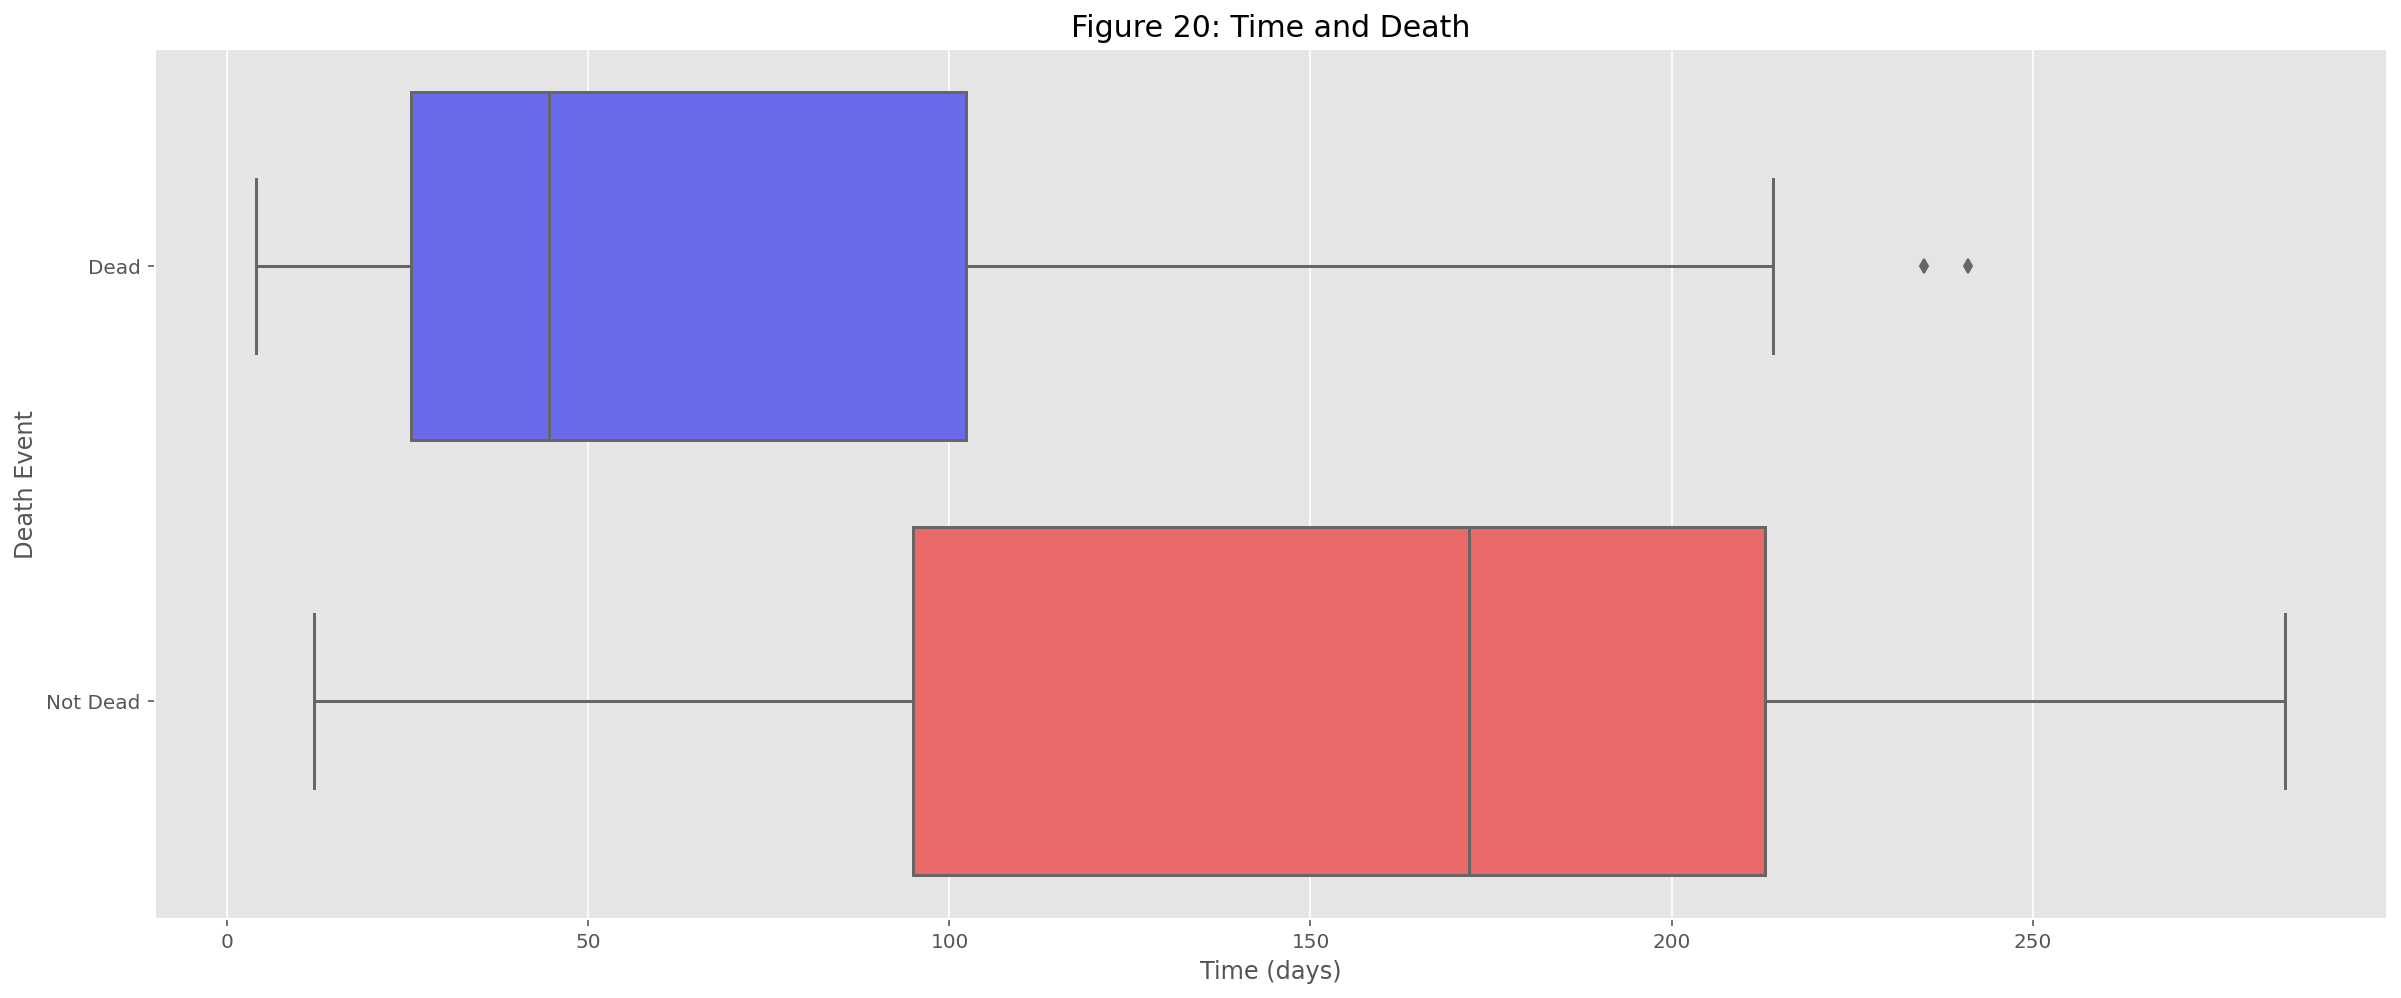

In [29]:
plt.figure(figsize = (20,8))
sns.boxplot(g_df['time'], g_df['DEATH_EVENT'], palette = 'seismic');
plt.title('Figure 20: Time and Death', fontsize = 15)
plt.xlabel("Time (days)");
plt.ylabel("Death Event");
plt.show();

Relationship between anaemia and death.

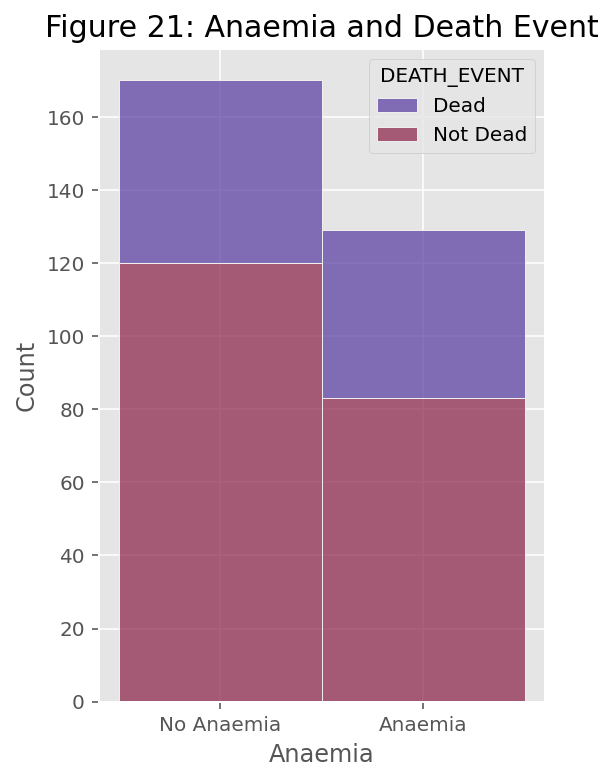

In [30]:
plt.figure(figsize = (4,6))
sns.histplot(binwidth=0.5, x="anaemia", hue="DEATH_EVENT", data=g_df, stat="count", multiple="stack", palette='twilight')
plt.title('Figure 21: Anaemia and Death Event', fontsize = 15)
plt.xlabel("Anaemia");
plt.ylabel("Count");
plt.show();

Relationship between high blood pressure and death.

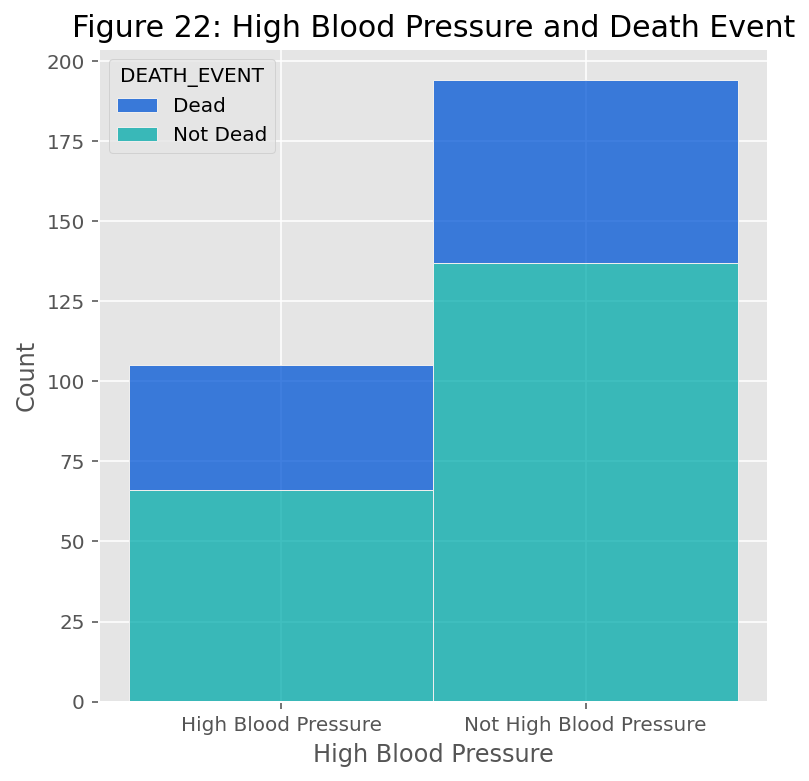

In [31]:
plt.figure(figsize = (6,6))
sns.histplot(binwidth=0.5, x="high_blood_pressure", hue="DEATH_EVENT", data=g_df, stat="count", multiple="stack", palette='winter')
plt.title('Figure 22: High Blood Pressure and Death Event', fontsize = 15)
plt.xlabel("High Blood Pressure");
plt.ylabel("Count");
plt.show();

Relationship between diabetes and death.

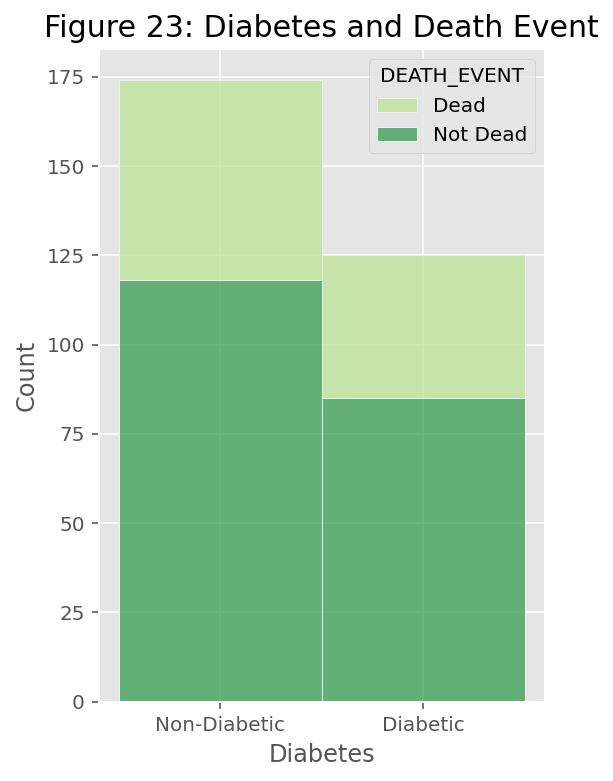

In [32]:
plt.figure(figsize = (4,6))
sns.histplot(binwidth=0.5, x="diabetes", hue="DEATH_EVENT", data=g_df, stat="count", multiple="stack", palette='YlGn')
plt.title('Figure 23: Diabetes and Death Event', fontsize = 15)
plt.xlabel("Diabetes");
plt.ylabel("Count");
plt.show();

Relationship between sex and death.

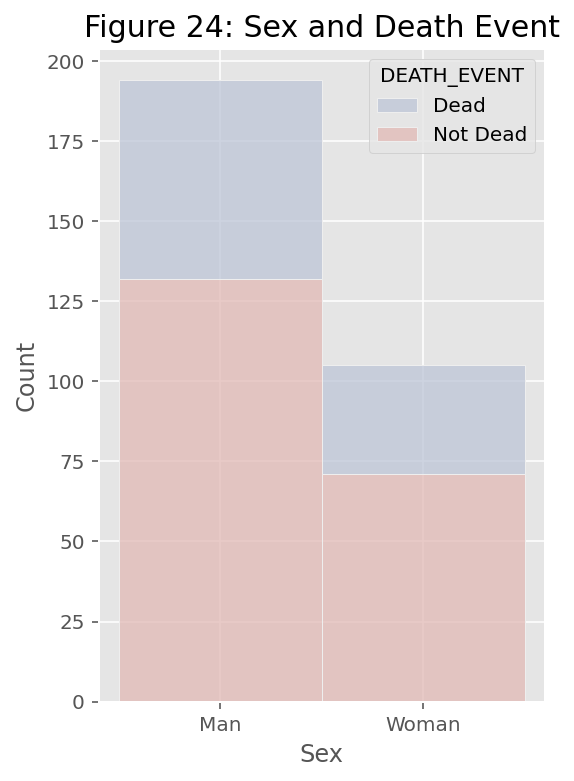

In [33]:
plt.figure(figsize = (4,6))
sns.histplot(binwidth=0.5, x="sex", hue="DEATH_EVENT", data=g_df, stat="count", multiple="stack", palette='vlag')
plt.title('Figure 24: Sex and Death Event', fontsize = 15)
plt.xlabel("Sex");
plt.ylabel("Count");
plt.show();

Relationship between smoking and death.

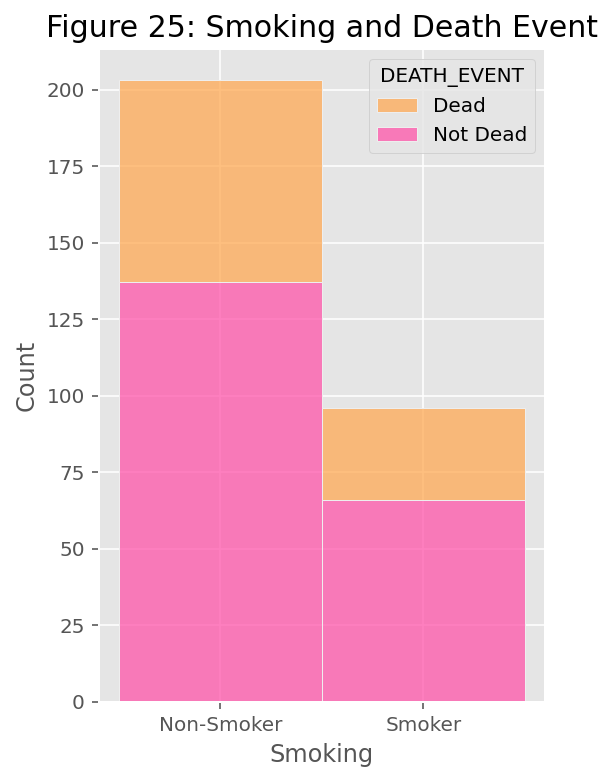

In [34]:
plt.figure(figsize = (4,6))
sns.histplot(binwidth=0.5, x="smoking", hue="DEATH_EVENT", data=g_df, stat="count", multiple="stack", palette='spring_r')
plt.title('Figure 25: Smoking and Death Event', fontsize = 15)
plt.xlabel("Smoking");
plt.ylabel("Count");
plt.show();

# Task 3: Data Modelling

## Classification

### K Nearest Neighbours

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn import metrics

In [36]:
Y = df["DEATH_EVENT"].copy()
y = Y.to_numpy()
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [37]:
X = df.copy()
del X["DEATH_EVENT"]
x = X.to_numpy()
x

array([[7.500e+01, 0.000e+00, 5.820e+02, ..., 1.000e+00, 0.000e+00,
        4.000e+00],
       [5.500e+01, 0.000e+00, 7.861e+03, ..., 1.000e+00, 0.000e+00,
        6.000e+00],
       [6.500e+01, 0.000e+00, 1.460e+02, ..., 1.000e+00, 1.000e+00,
        7.000e+00],
       ...,
       [4.500e+01, 0.000e+00, 2.060e+03, ..., 0.000e+00, 0.000e+00,
        2.780e+02],
       [4.500e+01, 0.000e+00, 2.413e+03, ..., 1.000e+00, 1.000e+00,
        2.800e+02],
       [5.000e+01, 0.000e+00, 1.960e+02, ..., 1.000e+00, 1.000e+00,
        2.850e+02]])

In [38]:
print(x.shape,y.shape)

(299, 12) (299,)


#### Parameter Tuning and Feature Selection: 

In [39]:
test_size = 0.4
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=test_size,random_state=6)

In [40]:
# code sourced from COSC2670 - Practical Data Science (RMIT University, 2022)
from sklearn.metrics import mean_squared_error
import math 
maxk= 15 #maximum value of k
mse_val = [] #to store rmse values for different k

#get the performance for each k: start from k = 1 to k = maxk-1
for k in range(1,maxk):
    preds = []
    #Make prediction for each instance i in xtest
    for i in range(x_test.shape[0]):
        #prepare to calculate the distance between current instance in xtest to everyone in xtrain. 
        v1 = x_test[i]
        distances = []
        #Find distances between new data and all the training data.
        for j in range(x_train.shape[0]):
            v2 = x_train[j]
            curDist = np.sqrt(np.sum((v1-v2)**2))
            distances.append(curDist)
        # Sort the distances in ascending order.
        distances = np.array(distances)
        inds = np.argsort(distances)
        distances = distances[inds]
        # Sorted values of target variable.
        tr_y_sorted = y_train[inds] 
        # Predicted value is the average of first k values of target vector.
        value = np.average(tr_y_sorted[:k])
    
        preds.append(value)
    err = mean_squared_error(y_test , preds)

    mse_val.append(err) #store rmse values

    print('MSE value for k= ' , k , 'is:', err)

MSE value for k=  1 is: 0.39166666666666666
MSE value for k=  2 is: 0.325
MSE value for k=  3 is: 0.2925925925925926
MSE value for k=  4 is: 0.2984375
MSE value for k=  5 is: 0.293
MSE value for k=  6 is: 0.2775462962962963
MSE value for k=  7 is: 0.26666666666666666
MSE value for k=  8 is: 0.25481770833333334
MSE value for k=  9 is: 0.2536008230452675
MSE value for k=  10 is: 0.241
MSE value for k=  11 is: 0.24056473829201103
MSE value for k=  12 is: 0.24207175925925925
MSE value for k=  13 is: 0.2423570019723866
MSE value for k=  14 is: 0.24315476190476193


Best Value of k using elbow curve is  10  with value =  0.24056473829201103


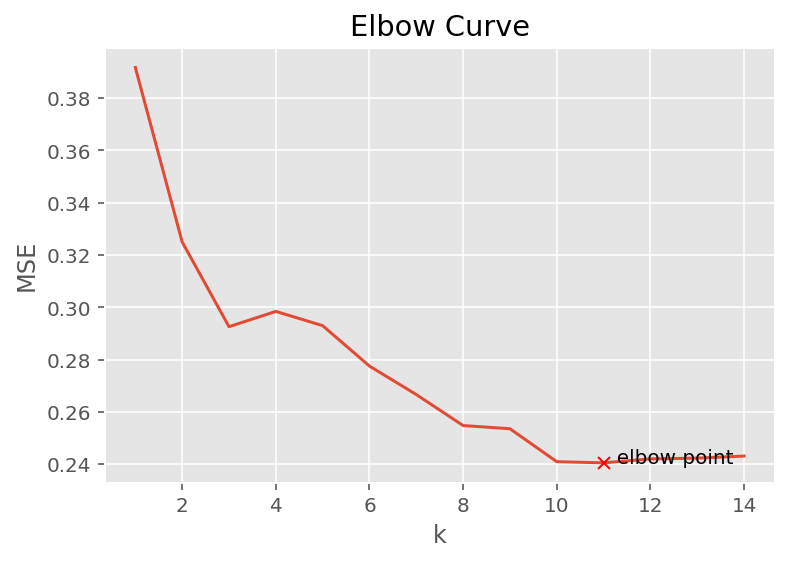

In [41]:
# code sourced from COSC2670 - Practical Data Science (RMIT University, 2022)
kVector=np.arange(1,maxk)
xl="k"
yl="MSE"
plt.xlabel(xl)
plt.ylabel(yl)
plt.title("Elbow Curve")
plt.plot(kVector,mse_val)##finding the k for the elbow point
k_val=np.argmin(mse_val)
plt.plot(k_val+1,mse_val[k_val],'rx')
plt.annotate("  elbow point", (k_val+1,mse_val[k_val]))

print("Best Value of k using elbow curve is ",k_val, " with value = ", mse_val[k_val])

In [42]:
from sklearn.utils import shuffle
new_Ind = []
cur_MaxScore = 0.0
col_num = 12
col_Ind_Random = shuffle(range(0,col_num), random_state=1)

In [43]:
# code sourced from COSC2670 - Practical Data Science (RMIT University, 2022)
for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = x[:, new_Ind]
    x_train, x_test, y_train, y_test = train_test_split(newData,y, test_size=0.4, random_state=6)
    clf = KNeighborsClassifier(k_val, weights='distance', p=1)
    fit = clf.fit(x_train, y_train)
    cur_Score = clf.score(x_test, y_test)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))

Score with 1 selected features: 0.6333333333333333
Score with 2 selected features: 0.6583333333333333
Score with 3 selected features: 0.6666666666666666
Score with 4 selected features: 0.6666666666666666
Score with 5 selected features: 0.675
Score with 6 selected features: 0.8
Score with 7 selected features: 0.8
Score with 8 selected features: 0.8


In [44]:
best_features = X.columns[new_Ind].values
new_features = X[best_features].copy()
new_x = new_features.to_numpy()

In [45]:
new_features

,creatinine_phosphokinase,ejection_fraction,anaemia,age,serum_creatinine,time,sex,high_blood_pressure
0,582,20,0,75,1.9,4,1,1
1,7861,38,0,55,1.1,6,1,0
2,146,20,0,65,1.3,7,1,0
3,111,20,1,50,1.9,7,1,0
4,160,20,1,65,2.7,8,0,0
...,...,...,...,...,...,...,...,...
294,61,38,0,62,1.1,270,1,1
295,1820,38,0,55,1.2,271,0,0
296,2060,60,0,45,0.8,278,0,0
297,2413,38,0,45,1.4,280,1,0


In [46]:
new_x.shape

(299, 8)

#### Test and Train

In [47]:
x_train, x_test, y_train, y_test = train_test_split(new_x,y,test_size=0.4,random_state=6)

In [48]:
x_train.shape, x_test.shape

((179, 8), (120, 8))

In [49]:
y_train.shape, y_test.shape

((179,), (120,))

In [50]:
from sklearn.metrics import classification_report
clf = KNeighborsClassifier(10, weights='distance', p = 1)
fit = clf.fit(x_train, y_train)
y_pre = fit.predict(x_test)
cm = confusion_matrix(y_test, y_pre)
print(cm)

[[78  1]
 [23 18]]


In [51]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.77      0.99      0.87        79
           1       0.95      0.44      0.60        41

    accuracy                           0.80       120
   macro avg       0.86      0.71      0.73       120
weighted avg       0.83      0.80      0.78       120



In [52]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pre))

Accuracy: 0.8


### Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier 

In [54]:
dx_train, dx_test, dy_train, dy_test = train_test_split(x, y, test_size=0.4, random_state=6) 

In [55]:
max_d_val = 0;
high_score = 0;
for m in range(1, 50):
    d_clf = DecisionTreeClassifier(max_depth=m)
    d_clf = d_clf.fit(dx_train, dy_train)
    dy_pre = d_clf.predict(dx_test)
    score = metrics.accuracy_score(dy_test, dy_pre)
    if score >= high_score:
        high_score = score
        max_d_val = m
    print("Accuracy for max depth", m, ":",metrics.accuracy_score(dy_test, dy_pre))

Accuracy for max depth 1 : 0.85
Accuracy for max depth 2 : 0.85
Accuracy for max depth 3 : 0.7666666666666667
Accuracy for max depth 4 : 0.7666666666666667
Accuracy for max depth 5 : 0.7
Accuracy for max depth 6 : 0.725
Accuracy for max depth 7 : 0.675
Accuracy for max depth 8 : 0.6916666666666667
Accuracy for max depth 9 : 0.675
Accuracy for max depth 10 : 0.6833333333333333
Accuracy for max depth 11 : 0.6666666666666666
Accuracy for max depth 12 : 0.6416666666666667
Accuracy for max depth 13 : 0.6666666666666666
Accuracy for max depth 14 : 0.6916666666666667
Accuracy for max depth 15 : 0.65
Accuracy for max depth 16 : 0.6916666666666667
Accuracy for max depth 17 : 0.6833333333333333
Accuracy for max depth 18 : 0.6833333333333333
Accuracy for max depth 19 : 0.675
Accuracy for max depth 20 : 0.6583333333333333
Accuracy for max depth 21 : 0.675
Accuracy for max depth 22 : 0.675
Accuracy for max depth 23 : 0.7
Accuracy for max depth 24 : 0.6583333333333333
Accuracy for max depth 25 : 0.6

In [56]:
d_clf = DecisionTreeClassifier(max_depth=max_d_val)
d_clf = d_clf.fit(dx_train, dy_train)
dy_pre = d_clf.predict(dx_test)
print("Accuracy:",metrics.accuracy_score(dy_test, dy_pre))

Accuracy: 0.85


In [57]:
cm = confusion_matrix(dy_test, dy_pre)
print(cm)

[[76  3]
 [15 26]]


In [58]:
print(classification_report(dy_test, dy_pre))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89        79
           1       0.90      0.63      0.74        41

    accuracy                           0.85       120
   macro avg       0.87      0.80      0.82       120
weighted avg       0.86      0.85      0.84       120



In [59]:
from sklearn import tree
with open('heart_attack.dot', 'w') as f:
    f = tree.export_graphviz(d_clf, out_file = f,
                            feature_names=X.columns,
                            class_names="DEATH_EVENT",
                            filled=True,
                            rounded=True,
                            special_characters=True)